Logistic Regression Model

Load the dataset

In [1]:
import pandas as pd
import ast

# Load training data
train_data = pd.read_csv('train_data.csv')
X_train_raw = train_data['X_train'].tolist()
y_train_raw = train_data['y_train'].tolist()

# Load test data
test_data = pd.read_csv('test_data.csv')
X_test_raw = test_data['X_test'].tolist()
y_test_raw = test_data['y_test'].tolist()

In [2]:
#Make it a list
X_train_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_train_raw]
X_test_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_test_raw]

# Convert the train and test data into strings for the CountVectorizer.
train_str = []
test_str = []

for text in X_train_raw:
    train_str.append(' '.join(text))
    
for text in X_test_raw:
    test_str.append(' '.join(text))

Utilize the Bag of Words (BoW) technique with CountVectorizer, limiting to the top 1000 words.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer, limiting max_features to the top 1000 words.
vectorizer = CountVectorizer(max_features=1000) 

# Fit the vectorizer on train and test data. Transform the data into BoW matrices.
train_bow = vectorizer.fit_transform(train_str).toarray()
test_bow = vectorizer.transform(test_str).toarray()

Train the data using Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=500)

# Fit the model on the training data
model.fit(train_bow, y_train_raw)

# Make predictions
y_pred = model.predict(test_bow)

Display the classification report for the Logistic Regression Model

In [6]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test_raw, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     24249
           1       0.85      0.92      0.88     28191
           2       0.80      0.76      0.78      6980
           3       0.87      0.82      0.85     11449
           4       0.84      0.79      0.81      9532
           5       0.75      0.72      0.73      2961

    accuracy                           0.87     83362
   macro avg       0.84      0.82      0.83     83362
weighted avg       0.87      0.87      0.87     83362



Confusion Matrix from the Logistic Regression model.

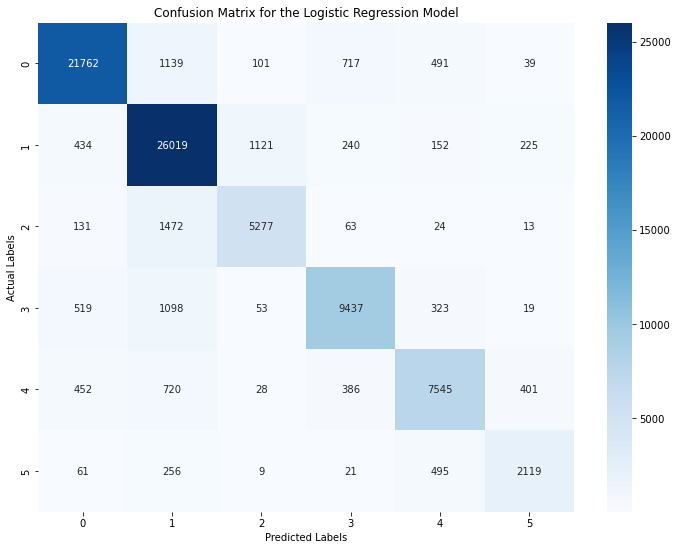

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test_raw, y_pred)

x_labels = range(6)
y_labels = range(6)
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for the Logistic Regression Model')
plt.show()


Display the Precision-Recall Curve

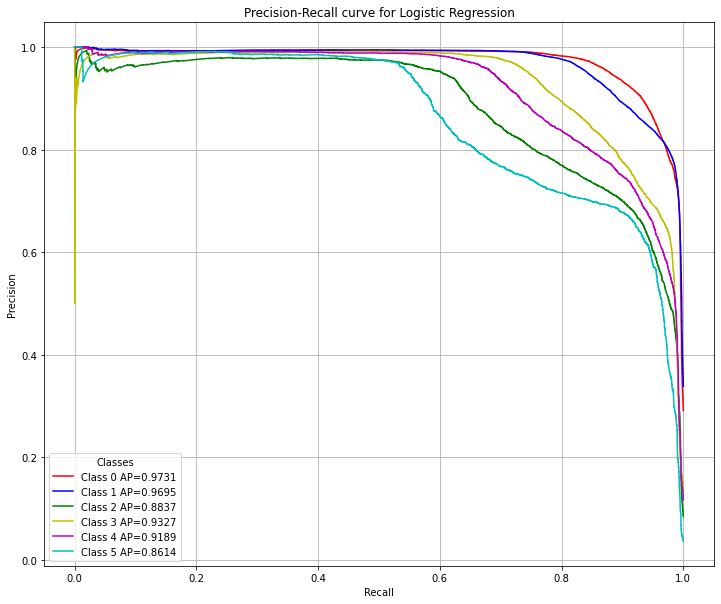

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data.
y_probs = model.predict_proba(test_bow)

# Initialize plot colors and figure size.
plot_colors = ['r', 'b', 'g', 'y', 'm', 'c', 'k']
plt.figure(figsize=(12, 10))

# Calculate and plot precision-recall curve for each class.
for i in range(len(model.classes_)):

    # Calculate precision, recall, and average precision.
    precision, recall, _ = precision_recall_curve((y_test_raw == model.classes_[i]), y_probs[:, i])
    avg_precision = average_precision_score((y_test_raw == model.classes_[i]), y_probs[:, i])
    
    # Plot the curve for the current class.
    current_color = plot_colors[i % len(plot_colors)]
    current_label = f'Class {model.classes_[i]} AP={avg_precision:.4f}'
    plt.plot(recall, precision, color=current_color, label=current_label)

# Plot the curves.
plt.title('Precision-Recall curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(title="Classes", loc='best')
plt.grid(True)
plt.show()


Plotting Training Loss for the model.

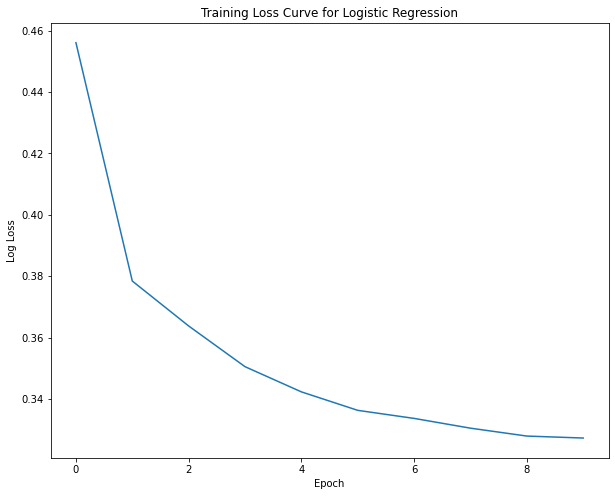

In [43]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Store the training data. 
X_train = train_bow
y_train = y_train_raw

# Implement SGDClassifier.
# loss = 'log' to specify logistic regression.
model = SGDClassifier(loss='log', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, penalty=None)
losses = []

# Train the model for 10 epochs.
for _ in range(10):  
    model.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Calculate and store the loss.
    probabilities = model.predict_proba(X_train)
    
    loss = log_loss(y_train, probabilities)
    losses.append(loss)

# Plot the loss curve.
plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training Loss Curve for Logistic Regression')
plt.show()
